In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy.optimize import curve_fit

def regresions(x, y, xerror, yerror, variable1, units1, variable2, units2, yinf, ymax, title=''):

  f = lambda x, a, b: a*x + b

  popt, pcov = curve_fit(f, x, y)

  a, b = popt
  slope = popt[0]
  intercept = popt[1]
  slope_std_err = np.sqrt(pcov[0, 0])
  intercept_std_err = np.sqrt(pcov[1, 1])

  x_new = np.linspace(np.min(x), np.max(x), 100)
  y_new = a*x_new + b

  residuals = []
  for i in range(len(y)): residuals.append(y[i] - slope*x[i] - intercept)

  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [2, 1]})

  ax1.errorbar(x, y, xerr=xerror, yerr=yerror,  fmt='o', label='Datos')
  ax1.plot(x_new, y_new, color='orange', linewidth=1, label=f'Regresión Lineal: \nB = ({slope:.2f}± {slope_std_err:.2f}) + ({intercept:.2f}± {intercept_std_err:.2f})')
  ax1.set_xlabel(f"{variable1} ({units1})", fontsize=11)
  ax1.set_ylabel(f"{variable2} ({units2})", labelpad = 25, fontsize=11)
  ax1.legend(loc='upper left')
  ax1.set_title(title)
  ax2.scatter(x, residuals, color='green', alpha=0.5, label='Residuales')
  ax2.axhline(0, color='black', linewidth=1, linestyle='--')
  ax2.set_xlabel(f"{variable1} ({units1})", fontsize=11)
  ax2.set_ylabel(f"Residuales ({units2})", labelpad = 15, fontsize=11)
  ax2.set_ylim([yinf, ymax])
  ax2.legend(loc='upper left')
  plt.tight_layout()
  plt.show()

  print(slope, slope_std_err)

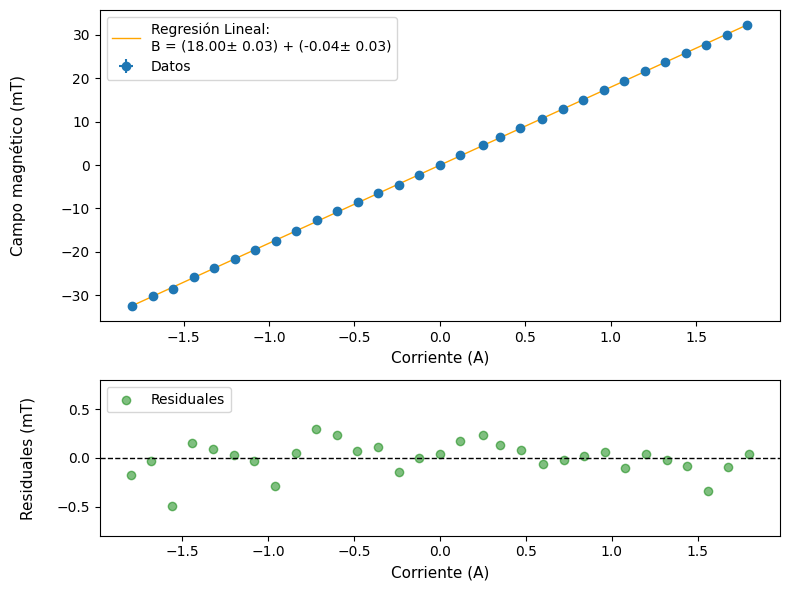

17.99597308287195 0.028384998451422488


In [ ]:
I = np.array([-1.8, -1.68, -1.56, -1.44, -1.32, -1.2, -1.08, -0.96, -0.84, -0.72, -0.6,
    -0.48, -0.36, -0.24, -0.12, 0, 0.12, 0.25, 0.35, 0.47, 0.6, 0.72, 0.84,
    0.96, 1.08, 1.2, 1.32, 1.44, 1.56, 1.68, 1.8])
B = np.array([-32.6, -30.3, -28.6, -25.8, -23.7, -21.6, -19.5, -17.6, -15.1, -12.7,
    -10.6, -8.6, -6.4, -4.5, -2.2, 0, 2.3, 4.7, 6.4, 8.5, 10.7, 12.9, 15.1,
    17.3, 19.3, 21.6, 23.7, 25.8, 27.7, 30.1, 32.4])

Ierr = 0.01
Berr = 0.1

regresions(I, B, Ierr, Berr, "Corriente", "A", 'Campo magnético', "mT", -.8, .8)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "Datosmagnetostriccion.xlsx"

# Leer datos de cada material
fe = pd.read_excel(path, sheet_name="Fe").rename(columns={"I A +/- 0.01": "I_A", "Min": "N"})
ni_plus = pd.read_excel(path, sheet_name="Ni +").rename(columns={"I A +/- 0.01": "I_A", "Min": "N"})
ni_minus = pd.read_excel(path, sheet_name="Ni -").rename(columns={"I A +/- 0.01": "I_A", "Min": "N"})

# Relación calibrada: B = (18.00 ± 0.03) * I + (-0.04 ± 0.03)
SLOPE = 18.00
INTERCEPT = -0.04

for df in [fe, ni_plus, ni_minus]:
    df["B_mT"] = SLOPE * df["I_A"] + INTERCEPT
    # ΔL/L en unidades de λ/(2L): es simplemente N
    df["strain_units"] = df["N"]  # ΔL/L × [2L/λ]
plt.figure(figsize=(7, 5))
plt.scatter(fe["B_mT"], fe["strain_units"], color="darkred", s=80, edgecolor='black', label="Hierro (Fe)")

plt.xlabel("Campo magnético B (mT)", fontsize=12)
plt.ylabel(r"$\Delta L / L$ [$\times\,\lambda/(2L)$]", fontsize=12)
plt.title("Hierro: Magnetostricción vs. Campo magnético", fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("fe_scatter.png", dpi=300)
plt.show()

plt.figure(figsize=(7, 5))
plt.scatter(ni_minus["B_mT"], ni_minus["strain_units"], color="blue", s=70, edgecolor='black', label="Barrido negativo (Ni -)")
plt.scatter(ni_plus["B_mT"], ni_plus["strain_units"], color="orange", s=70, edgecolor='black', label="Barrido positivo (Ni +)")

plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Campo magnético B (mT)", fontsize=12)
plt.ylabel(r"$\Delta L / L$ [$\times\,\lambda/(2L)$]", fontsize=12)
plt.title("Níquel: Magnetostricción en ambos barridos", fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("ni_scatter_both.png", dpi=300)
plt.show()
